# Previsione dello stipendio di un dipendente nell'ambito della data science sulla base delle condizioni di lavoro

**Progetto di Programmazione di Applicazioni Data Intensive a.a. 2021/22**

Realizzato da: Lucia Castellucci

lucia.castellucci2@studio.unibo.it

# Caricamento Librerie
Per prima cosa carichiamo le librerie per effettuare operazioni sui dati

- NumPy per creare e operare su array a N dimensioni
- pandas per caricare e manipolare dati tabulari
- matplotlib per creare grafici

Importiamo le librerie usando i loro alias convenzionali e abilitando l'inserimento dei grafici direttamente nel notebook

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dei dati
Carichiamo ora il dataset con i dati ottenuto da [Kaggle](https://www.kaggle.com/). Il dataset è denominato "Data Science Job Salaries".

Il dataset è stato ricavato da un indagine effettuata su un campione di 606 lavoratori del campo della Data Science inserendo le informazioni ricavate in un file formato csv. La rilevazione è stata effettuata su salari percepiti tra gli anni 2020 e 2022.

**Significato delle colonne**

Le feature presenti nel Dataset sono:

- `work_year`: L'anno in cui è stato percepito il salario.
- `experience_level`: Il livello di esperienza del lavoratore, durante l'anno lavorativo campionato. I valori della colonna sono i seguenti:
    - EN: Entry-level
    - MI: Junior (Mid-level) 
    - SE: Intermediate (Senior-level)
    - EX: Expert (Executive-level) 
    - Director
- `employment_type`: Il contratto di lavoro in termini di orario. I valori della colonna sono i seguenti:
    - PT: Part-time
    - FT: Full-time
    - CT: Contract 
    - FL: Freelance
- `job_title`: Il ruolo ricoperto durante l'anno lavorativo.	
- `salary`: L'importo totale della retribuzione lorda pagata.
- `salary_currency`: La valuta dello stipendio rispettando lo standard del codice valuta ISO 4217.
- `employee_residence`: Il paese di residenza dei lavoratori durante l'anno lavorativo rispettando lo standard del codice paese ISO 3166.
- `remote_ratio`: La parte dell'impiego svolta da remoto. I valori della colonna sono i seguenti:
    - 0: Niente lavoro da remoto
    - 50: Parzialmente da remoto
    - 100: Totalmente da remoto (sopra una percentuale dell'80%)
- `company_location`:	Il paese dove risiede la sede principale del datore di lavoro o la succursale appaltante rispettando lo standard del codice paese ISO 3166.
- `company_size`:	Il numero medio di persone che hanno lavorato per l'azienda durante l'anno lavorativo. I valori della colonna sono i seguenti:
    - S: Per aziende con meno di 50 impeigati (Small).
    - M: Per aziende con un numero di impiegati compresi tra i 50 e i 250 (Medium).
    - L: Per aziende con più di 250 impeigati (Large).

La misura per la quale verrano svolte le analisi predittive è:

- `salary_in_usd` : Indica il salario percepito, espresso in nella valuta USD, ed è una variabile continua.

In [102]:
data = pd.read_csv("ds_salaries.csv", index_col=0,)

In [103]:
data.info(verbose=False, memory_usage="deep");

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Columns: 11 entries, work_year to company_size
dtypes: int64(4), object(7)
memory usage: 277.0 KB


In [104]:
starting_data = data

In [105]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Osserviamo che le istanze sono 607 e che sono presenti 11 features di cui 7 sono di tipo object. Il dataset così caricato occupa un eccessivo spazio in memoria per cui lo carichiamo nuovamente specificando quali dati adottare come categorici. In particolare segnaliamo come categorico: il livello di esperienza, il tipo di lavoro, il tipo di mansione, la valuta, la residenza del lavoratore, la locazione della sede e le dimensioni aziendali.

In [106]:
categorical = ["experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", 
               "company_location", "company_size"];

In [107]:
data = pd.read_csv("ds_salaries.csv", index_col=0, dtype={x:"category" for x in categorical});

In [108]:
data.info(verbose=False, memory_usage="deep");

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Columns: 11 entries, work_year to company_size
dtypes: category(7), int64(4)
memory usage: 48.0 KB


Alcune feature non sono rilevanti per il nostro problema quindi possiamo rimuovere le colonne dal dataframe. 

In [109]:
data = data.drop(['salary', 'salary_currency', 'employee_residence'], axis=1)

Le feature che abbiamo conservato sono le seguenti:
- `work_year`: L'anno in cui è stato percepito il salario.
- `experience_level`: Il livello di esperienza del lavoratore, durante l'anno lavorativo.
- `employment_type`: Il tipo di lavoro (in termini di orario). 
- `job_title`: Il ruolo ricoperto durante l'anno lavorativo.	
- `remote_ratio`: La quantità complessiva di lavoro svolto da remoto. 
- `company_location`:	Il paese della sede principale del datore di lavoro o della succursale appaltante rispettando lo standard del codice paese ISO 3166.
- `company_size`:	Il numero medio di persone che hanno lavorato per l'azienda durante l'anno lavorativo.


In [110]:
[f for f in list(data) if f != 'salary_in_usd']

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'remote_ratio',
 'company_location',
 'company_size']

# Esplorazione e pulizia dei dati

Visualizziamo qualche statistica in merito ai dati in nostro possesso e prepariamo i dati caricati ad essere elaborati dal modello. 

Prima di tutto utilizziamo il comando `describe()` di Pandas per visualizzare qualche dato rilevante per le feature di tipo intero come la media, la deviazione standard e i percentili.

In [111]:
data.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


Vediamo ora quanti valori nulli abbiamo nel dataframe per le varie colonne.

In [112]:
data.shape[0]-data.count()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

Non ce ne sono, per cui procediamo con altre analisi.

Osserviamo anche che i dati variano molto all'interno della feature `job_title` e nella feature `company_location` mentre nelle altre feature i dati variano tra 3, al masssimo 4, valori diversi.

In [113]:
for x in ['work_year', 'experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_location', 'company_size']:
    print(x+":  \t"+ str(data[x].nunique()));

work_year:  	3
experience_level:  	4
employment_type:  	4
job_title:  	50
remote_ratio:  	3
company_location:  	50
company_size:  	3


Riduciamo il numero di valori tra cui possono variare i valori della feature `job_title` e visualizziamoli graficamente tramite un istogramma.

In [114]:
works = list(data["job_title"].value_counts()[:17].index)
#17 con tutti 

In [115]:
data.drop(data[np.logical_not(data['job_title'].isin(works))].index, inplace=True)

In [116]:
import warnings
def plot_bar(feature, n, title):
    data[feature].value_counts()[:n].plot.bar(figsize=(15, 4))
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        plt.axes().set_title(title)
        plt.show()

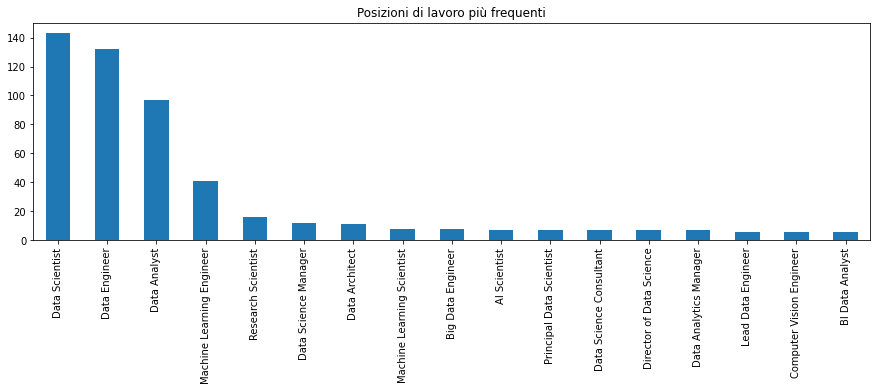

In [117]:
plot_bar("job_title", data["job_title"].nunique(), "Posizioni di lavoro più frequenti")

Eseguiamo lo stesso tipo di operazione sulla feature `company_location`.

In [118]:
countries = list(data["company_location"].value_counts()[:15].index)
#15 con tutti

In [119]:
data.drop(data[np.logical_not(data['company_location'].isin(countries))].index, inplace=True)

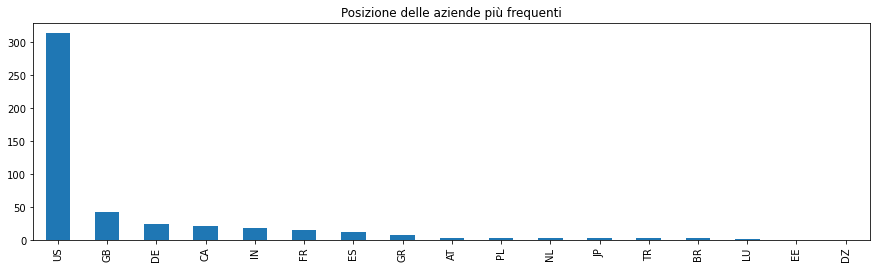

In [120]:
plot_bar("company_location", data["job_title"].nunique(), "Posizione delle aziende più frequenti")

Visualizziamo graficamente anche i dati delle feature `company_size`, `remote_ratio`, `experience_level` e `employment_type`.

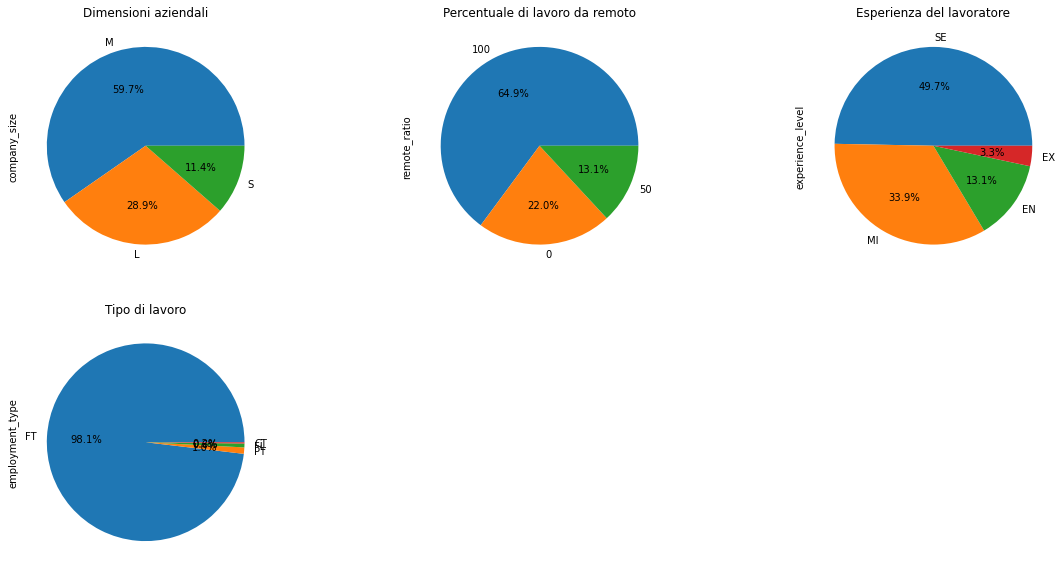

In [121]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Dimensioni aziendali')
data['company_size'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(2, 3, 2)
plt.title('Percentuale di lavoro da remoto')
data['remote_ratio'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(2, 3, 3)
plt.title('Esperienza del lavoratore')
data['experience_level'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(2, 3, 4)
plt.title('Tipo di lavoro')
data['employment_type'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

Osserviamo che il valore della feature `employment_type` è per il 98,1% uguale a "FT". 
Procediamo dunque ad eliminare le istanze che hanno un valore diverso da "FT", vista la scarsa numerosità campionaria, ed eliminiamo la feature che abbiamo riscontrato non essere rilevante. 

In [122]:
data.drop(data[data['employment_type'] != "FT"].index, inplace=True)

In [123]:
data.drop(['employment_type'], axis=1, inplace=True)

Analizziamo ora la variabile da predirre `salary_in_usd`. Utilizziamo il comando `describe()` di Pandas per visualizzare qualche misura rilevante per il salario come la media, la deviazione standard e i percentili.

In [124]:
data['salary_in_usd'].describe()

count       472.000000
mean     115422.709746
std       60999.491782
min        5679.000000
25%       70409.750000
50%      109640.000000
75%      150018.750000
max      450000.000000
Name: salary_in_usd, dtype: float64

Osserviamo infine come si distribuiscono i salari attraverso alcuni grafici.

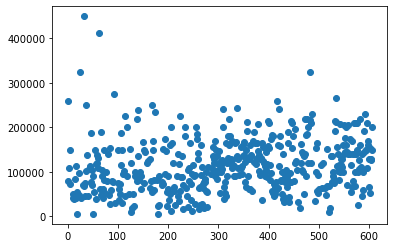

In [125]:
plt.scatter(data["salary_in_usd"].index, data["salary_in_usd"].values)

<AxesSubplot:>

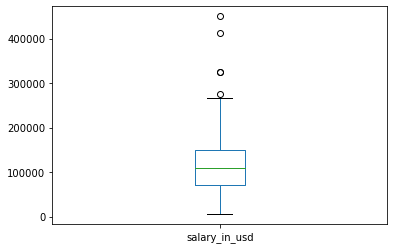

In [126]:
data["salary_in_usd"].plot.box()

Dall'ultimo grafico osserviamo che ci sono valori molto distanti tra loro all'interno della feature. Per cui decidiamo di eliminare i dati che contengono un salario maggiore di un un certo importo adottato come soglia.

In [127]:
data.drop(data[np.logical_not(data['salary_in_usd'].isin([n for n in range(0, 350000)]))].index, inplace=True)

Osserviamo ora gli stessi grafici visualizzati in precedenza dopo aver eliminato le istanze con valori oltre la soglia e notiamo un miglioramento nella distribuzione di essi.

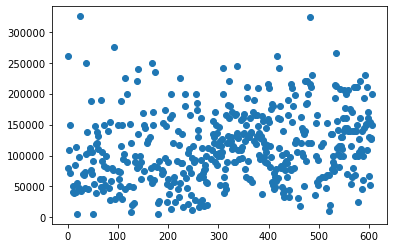

In [128]:
plt.scatter(data["salary_in_usd"].index, data["salary_in_usd"].values)

<AxesSubplot:>

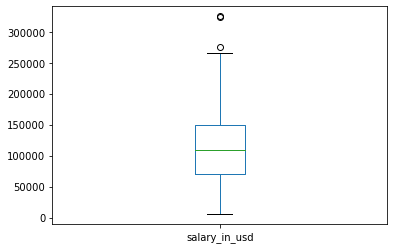

In [129]:
data["salary_in_usd"].plot.box()

Esaminando la correlazione tra coppie di feature osserviamo il legame che intercorre, ad esempio, tra la variabile `company_size` e `salary_in_usd`.

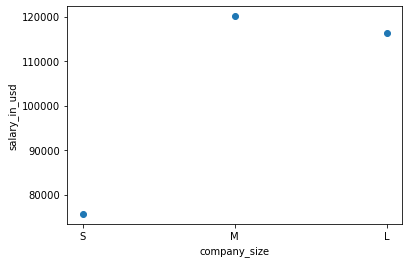

In [130]:
avg_salary = []
for i in ["S", "M", "L"]:
    avg_salary.append(data[data["company_size"]== i]["salary_in_usd"].mean())
avg_salary = pd.Series(avg_salary)
plt.xlabel("company_size");
plt.ylabel("salary_in_usd");
plt.scatter(["S", "M", "L"], avg_salary)

Possiamo osservare dal grafico che le due feature non sono correlate siccome i valori non giaciono sulla stessa retta dunque la dimensione aziendale non è legata alla media degli stipendi.

In seguito analizziamo la correlazione tra la feature `experience_level` e il `salary_in_usd`.

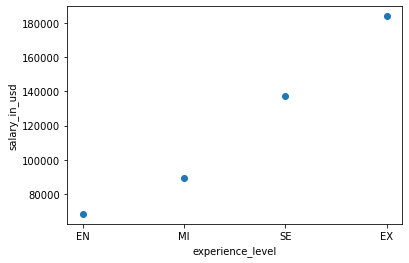

In [131]:
avg_salary = []
for i in ["EN", "MI", "SE", "EX"]:
    avg_salary.append(data[data["experience_level"]== i]["salary_in_usd"].mean())
avg_salary = pd.Series(avg_salary)
plt.xlabel("experience_level");
plt.ylabel("salary_in_usd");
plt.scatter(["EN", "MI", "SE", "EX"], avg_salary)

In questo caso notiamo un associazione tra la media degli stipendi per ogni livello di esperienza e il grado di esperienza quindi possiamo definire che all'aumentare del grado di esperienza corrisponda un aumento del salario.

# Preparazione del modello

Una volta conclusa la preparazione del dataset ci occupiamo del modello. 

Dapprima convertiamo le features categoriche di modo che ad ogni colonna corrisponda un valore. Eseguiamo questa operazione sulle fetures `experience_level`, `employment_type`, `job_title`, `company_location`, `company_size` facendo attenzione a conservare una copia del DataFrame che potrebbe servire in seguito.

In [132]:
categorical_features = ["experience_level", "employment_type", "job_title", "company_location", "company_size"];

In [133]:
data_reduced = data

In [134]:
data = pd.get_dummies(data, prefix=None)

A questo punto separiamo le features dalla variabile da predirre e dividiamo il dataset di modo che una parte di esso possa essere usata per il traning ed un'altra per la validation.

In [135]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [137]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

index = X_train.columns.values.tolist()

Iniziamo ora a creare i vari modelli di regressione, a tale scopo utilizzeremo le Pipeline di sklearn.

Prima di tutto importiamo le librerie necessarie:

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

Importiamo anche la GridSearch che ci aiuterà ad individuare un set di iperparametri che massimizzi l'accuratezza del modello.

In [139]:
#sopprimiamo i warning della GridSearch
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

Definiamo ora qualche funzione che ci sarà utile per valutare i vari modelli di regressione.

In [140]:
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.proportion import proportion_confint

def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def print_eval(X, y, model):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    re = relative_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"   Mean squared error: {mse:.5}")
    print(f"       Relative error: {re:.5%}")
    print(f"R-squared coefficient: {r2:.5}")

def confidence_interval(instance, acc, confidence):    
    return proportion_confint(instance * acc, instance, 1-confidence/100, method='wilson')

E una funzione che ci sarà utile per valutare quali sono gli iperparametri migliori della grid serch.

In [141]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

def grid_test(model, grid):
    kf = KFold(5, shuffle=True, random_state=42)
    gs = GridSearchCV(model, grid, cv=kf)
    gs.fit(X_train, y_train)
    print(gs.best_params_)
    cv_results = cross_validate(model, X, y, cv=kf)
    cv_scores = cv_results["test_score"]
    print("--------------------------------")
    print(f"           Mean scores: {cv_scores.mean():.5%}")
    print(f"            Std scores: {cv_scores.std():.5}")
    print("--------------------------------")
    print_eval(X_val, y_val, gs)
    return gs

Procediamo ora con l'implementazione dei modelli di regressione.

**Regressione Lineare**

Come primo modello testiamo la regressione lineare.

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [143]:
linear_model = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", LinearRegression())
])
scores = cross_val_score(linear_model,X_train , y_train, cv=5)
print(scores.mean())

-1.3822093946913488e+26


Visti i risultati pessimi della regressione lineare valutiamo di adottare un approccio polinomiale.

In [144]:
linear_model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", LinearRegression())
])
kf = KFold(5, shuffle=True, random_state=42)
scores = cross_val_score(linear_model,X_train , y_train, cv=kf)
print(scores.mean())

-3.2736367332915827e+27


Notiamo come l'accuratezza raggiunta, sia con l'approccio polinomiale che con l'approcio lineare sia pessima. Escludiamo dunque la regressione linare dai modelli che possiamo considerare e valutiamo qualche modello di regressione non lineare, che applichi la regolarizzazione, con lo scopo di modificare la funzione d'errore su cui si basa l'addestramento.

**Regressione Ridge**

Importiamo e testiamo, come secondo modello di regressione non lineare, il modello Ridge. La regressione _Ridge_ è un tipo di regressione lineare con regolarizzazione L2. La regolarizzazione L2 è basata sulla norma 2 (norma euclidea) e impedisce che i parametri del modello assumano valori troppo alti. Cerchiamo di capire se può essere un modello sufficientemente accurato.

In [145]:
from sklearn.linear_model import Ridge

In [1]:
model = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", Ridge())
])

NameError: name 'Pipeline' is not defined

Utilizziamo la grid search per individuare un set di iperparametri che massimizzi l'accuratezza e visualizziamone i risultati.

In [147]:
grid = {
    "scale": [MinMaxScaler(), StandardScaler()],
    "linreg__alpha":  [0.1, 1, 10, 50]
}
gs = GridSearchCV(model, param_grid=grid, cv=5)

In [148]:
gs.fit(X_train, y_train)
sel = ["rank_test_score","mean_test_score","params"]
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

,rank_test_score,mean_test_score,params
0,1,0.529833,"{'linreg__alpha': 0.1, 'scale': MinMaxScaler()}"
5,2,0.521992,"{'linreg__alpha': 10, 'scale': StandardScaler()}"
7,3,0.518803,"{'linreg__alpha': 50, 'scale': StandardScaler()}"
3,4,0.518757,"{'linreg__alpha': 1, 'scale': StandardScaler()}"
1,5,0.518198,"{'linreg__alpha': 0.1, 'scale': StandardScaler()}"
2,6,0.507696,"{'linreg__alpha': 1, 'scale': MinMaxScaler()}"
4,7,0.445353,"{'linreg__alpha': 10, 'scale': MinMaxScaler()}"
6,8,0.343027,"{'linreg__alpha': 50, 'scale': MinMaxScaler()}"


In [149]:
confidence = 95
lower, upper = confidence_interval(len(X_val), gs.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))

Interval with confidence 95%: 
Pmin = 40.1422%
Pmax = 55.5820%


I risultati utilizzando la regressione Ridge sembrano accettabili. 

Considerando che il numero dei parametri è abbastanza alto, evitiamo di utilizzare la regressione polinomiale che comporterebbe un aumento del numero di feature e quindi dei tempi d'esecuzione.

**Regressione Lasso**

Importiamo e testiamo, come secondo modello di regressione non lineare, il modello Lasso. La regressione _Lasso_ è un tipo di regressione lineare ma con regolarizzazione L1. La regolarizzazione L1 è basata sulla norma 1 e permette l'addestramento di un modello poco complesso nel quale vengono ignorate le variabili poco rilevanti. Cerchiamo di capire se può essere un modello sufficientemente accurato.

In [150]:
from sklearn.linear_model import Lasso

In [151]:
model = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", Lasso())
])

Utilizziamo la grid search per individuare un set di iperparametri che massimizzi l'accuratezza e visualizziamone i risultati.

In [152]:
grid = { 
    "scale": [MinMaxScaler(), StandardScaler()],
    "linreg__alpha": [0.1, 0.5, 1]
}
gs = GridSearchCV(model, param_grid=grid, cv=5)

In [153]:
gs.fit(X_train, y_train)
sel = ["rank_test_score","mean_test_score","params"]
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

,rank_test_score,mean_test_score,params
4,1,0.522186,"{'linreg__alpha': 1, 'scale': MinMaxScaler()}"
2,2,0.517072,"{'linreg__alpha': 0.5, 'scale': MinMaxScaler()}"
5,3,0.511814,"{'linreg__alpha': 1, 'scale': StandardScaler()}"
0,4,0.511545,"{'linreg__alpha': 0.1, 'scale': MinMaxScaler()}"
3,5,0.510830,"{'linreg__alpha': 0.5, 'scale': StandardScaler()}"
1,6,0.510030,"{'linreg__alpha': 0.1, 'scale': StandardScaler()}"


In [154]:
model = Pipeline([
    ("scale",  MinMaxScaler()),
    ("linreg", Lasso(alpha=1))
])
model.fit(X_train, y_train);

In [155]:
lasso = pd.Series(model.named_steps["linreg"].coef_, index)
c = len(lasso[lasso>0])
print("Features positive estratte: "+ str(c))
lasso[lasso>0]

Features positive estratte: 18


work_year                                 9685.143778
remote_ratio                              2536.648552
experience_level_EX                      61215.397465
experience_level_SE                       1982.226897
job_title_AI Scientist                   16473.440666
job_title_Big Data Engineer              25172.515619
job_title_Computer Vision Engineer        7501.272157
job_title_Data Architect                 29067.585743
job_title_Data Science Consultant         2556.547155
job_title_Data Science Manager           16243.676089
job_title_Machine Learning Engineer       9102.008138
job_title_Machine Learning Scientist     24690.402424
job_title_Principal Data Scientist       60914.099182
company_location_CA                      16942.637394
company_location_JP                     133834.081922
company_location_US                      42831.346843
company_size_L                            7964.110877
company_size_M                            4874.586738
dtype: float64

In [156]:
lasso[lasso==0]

job_title_3D Computer Vision Researcher         0.0
job_title_Analytics Engineer                    0.0
job_title_Applied Data Scientist                0.0
job_title_Applied Machine Learning Scientist    0.0
job_title_Big Data Architect                    0.0
                                               ... 
company_location_RU                             0.0
company_location_SG                             0.0
company_location_SI                             0.0
company_location_UA                             0.0
company_location_VN                             0.0
Length: 69, dtype: float64

In [157]:
confidence = 95
lower, upper = confidence_interval(len(X_val), gs.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))

Interval with confidence 95%: 
Pmin = 38.3759%
Pmax = 53.7814%


La regressione Lasso annulla i valori di 69 feature. Prendiamo in considerazione il modello in quanto abbiamo ottenuto dei risultati accettabili.

Non avendo ottenuto risultati particolarmente ottimi facciamo un tentativo con delle feature polinomiali. Tuttavia, il numero di variabili create sarebbe eccessivo esattamente come i tempi di esecuzione. Per cui utilizziamo un modello non lineare, che non aggiunge variabili. 

**Regressione con funzioni kernel**

Importiamo e facciamo un tentativo con le funzioni kernel, testando due diverse funzioni. 

La prima funzione di kernel che testiamo è `poly`. E' una funzione di kernel polinomiale. Il parametro `degree` infatti rappresenta il grado del polinomio.

In [158]:
from sklearn.kernel_ridge import KernelRidge

In [159]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("regr", KernelRidge(kernel="poly"))
])

In [160]:
grid = {
    "regr__degree": range(2, 11),
    "regr__alpha": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 10, 20, 25, 30],
}
gs = grid_test(model, grid)

{'regr__alpha': 0.5, 'regr__degree': 2}
--------------------------------
           Mean scores: 52.38204%
            Std scores: 0.066259
--------------------------------
   Mean squared error: 2.1632e+09
       Relative error: 48.33290%
R-squared coefficient: 0.48558


In [161]:
confidence = 95
lower, upper = confidence_interval(len(X_val), gs.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))

Interval with confidence 95%: 
Pmin = 40.8687%
Pmax = 56.3167%


I risultati sembrano in linea con gli altri modelli di regressione non lineari. Testiamo anche la funzione di kernel `RFB` (_radial basis function_). I valori della funzione RBF sono tanto elevati quanto i valori di X sono vicini alla media che, considerando che si stanno usando dei dati standardizzati, sarà pari a 0. Il parametro `gamma` è l'ampiezza della gaussiana della funzione.

In [162]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("regr", KernelRidge(kernel="rbf"))
])
grid = {
    "regr__gamma": [0.01, 0.05, 0.1],
    "regr__alpha": [0.01, 0.1, 1, 10, 20],
}
gs = grid_test(model, grid)

{'regr__alpha': 0.1, 'regr__gamma': 0.01}
--------------------------------
           Mean scores: 47.66652%
            Std scores: 0.078371
--------------------------------
   Mean squared error: 2.2601e+09
       Relative error: 46.64336%
R-squared coefficient: 0.46255


In [163]:
confidence = 95
lower, upper = confidence_interval(len(X_val), gs.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))

Interval with confidence 95%: 
Pmin = 38.6386%
Pmax = 54.0505%


I due modelli hanno un'accuratezza simile, tuttavia, la media dei punteggi della funzione di kernel `poly` è superiore a quella della funzione di kernel `RFB` di circa il 5% per cui valutiamo più positivamente la prima funzione.

# Valutazione dei modelli migliori

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

index = X_train.columns.values.tolist()

Mettiamo a confronto l'accuratezza dei 3 modelli migliori individuati.

In [165]:
ridge = Pipeline([
    ("scale",  MinMaxScaler()),
    ("linreg", Ridge(alpha=0.1))
])
lasso = Pipeline([
    ("scale",  MinMaxScaler()),
    ("linreg", Ridge(alpha=1))
])
kernel = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", KernelRidge(alpha=0.5, kernel="poly", degree=2))
])
ridge.fit(X_train, y_train);
lasso.fit(X_train, y_train);
kernel.fit(X_train,y_train);

In [166]:
print("Ridge model Train")
print_eval(X_train, y_train, ridge)
print("--------------------------------")
print("Ridge model Val")
print_eval(X_val, y_val, ridge)
print("================================")
print("Lasso model Train")
print_eval(X_train, y_train, lasso)
print("--------------------------------")
print("Lasso model Val")
print_eval(X_val, y_val, lasso)
print("================================")
print("KernelRidge function 'poly' model Train")
print_eval(X_train, y_train, kernel)
print("--------------------------------")
print("KernelRidge function 'poly' model Val")
print_eval(X_val, y_val, kernel)
print("================================")

Ridge model Train
   Mean squared error: 1.022e+09
       Relative error: 31.35633%
R-squared coefficient: 0.64083
--------------------------------
Ridge model Val
   Mean squared error: 2.1947e+09
       Relative error: 49.56683%
R-squared coefficient: 0.4781
Lasso model Train
   Mean squared error: 1.0548e+09
       Relative error: 32.47353%
R-squared coefficient: 0.62931
--------------------------------
Lasso model Val
   Mean squared error: 1.9417e+09
       Relative error: 46.76894%
R-squared coefficient: 0.53826
KernelRidge function 'poly' model Train
   Mean squared error: 9.0915e+08
       Relative error: 28.37010%
R-squared coefficient: 0.68051
--------------------------------
KernelRidge function 'poly' model Val
   Mean squared error: 2.1632e+09
       Relative error: 48.33290%
R-squared coefficient: 0.48558


Paragoniamo Lasso e Ridge notando che il primo sembra il modello che ha sofferto meno l'overfitting dei dati. Infatti, osservando la differenza tra le misure dell'addestramento e quelle della validazione, notiamo che quella del modello Lasso è inferiore rispetto a quella del modello Ridge. Ad esempio, la differenza tra R quadro dell'addestramento e R quadro della validazione nel modello Ridge è di 0,16 mentre la differenza tra i due coefficenti nel modello Lasso è di 0,09. Dunque, la diefferenza tra i coefficenti del modello Lasso è inferiore del 45% circa rispetto a quella del modello Ridge. 

La medesima osservazione può essere fatta confrontando il modello Lasso con il modello KernelRidge. Infatti, sempre prendendo come esempio R quadro, la differenza tra i coefficienti in fase di addestramento e quelli in fase di validazione del modello Lasso è di 0.09 e quella dei coefficenti del modello KernelRidge è di 0.19. Dunque, la diefferenza tra i coefficenti del modello Lasso è inferiore del 47% circa rispetto a quella del modello KernelRidge. 

Inoltre, possiamo notare che il modello Lasso possiede il coefficiente R quadro in fase di validazione più alto.

Procediamo dunque con le considerazioni finali utilizzando il modello Lasso.

# Interpretazione della conoscenza appresa dal modello

Interpretiamo tramite l'analisi dei coefficienti degli iperpiani la conoscenza appresa dal modello confrontandolo coi dati in nostro possesso e con le conoscenze rispetto al dominio applicativo che possediamo.

In [167]:
index = X_train.columns.values.tolist()
coefs = pd.Series(lasso.named_steps["linreg"].coef_, index).sort_values()
coefs.head(20)

company_location_TR                -43087.753581
job_title_BI Data Analyst          -39777.407044
job_title_Data Analyst             -37527.115163
job_title_Lead Data Engineer       -33461.831002
experience_level_EN                -33316.883561
company_location_IN                -32883.529087
job_title_Data Analytics Manager   -28681.290108
company_location_PL                -27458.084067
company_location_NL                -24975.699184
company_location_BR                -17968.296765
company_location_ES                -17201.901559
experience_level_MI                -14873.439053
company_size_S                     -14770.150098
job_title_Research Scientist        -8675.591323
company_location_GR                 -8432.097561
job_title_Data Engineer             -7678.551418
job_title_Data Scientist            -7294.013700
company_location_FR                 -3180.677739
company_location_AT                 -1245.656115
job_title_Business Data Analyst         0.000000
dtype: float64

In [168]:
coefs.tail(20)

job_title_Data Science Consultant        1793.001949
experience_level_SE                      3918.944014
job_title_Director of Data Science       4141.550355
job_title_Computer Vision Engineer       4173.997212
job_title_Machine Learning Engineer      6105.419614
company_size_M                           6549.348144
company_location_DE                      7449.309653
company_location_GB                      8209.580085
company_size_L                           8220.801954
work_year                                8409.515271
job_title_AI Scientist                  11406.695076
job_title_Big Data Engineer             13806.299565
job_title_Data Science Manager          14611.112318
company_location_CA                     25105.405585
job_title_Data Architect                28069.112865
job_title_Machine Learning Scientist    31525.786610
experience_level_EX                     44271.378600
job_title_Principal Data Scientist      47462.824193
company_location_US                     53439.

Osserviamo che le feature che influenzano maggiormente in modo negativo lo stipendio sono:
- Turchia come localizzazione dell'impresa
- BI (Business Intelligence) Data Analyst come mansione ricoperta
- Data Analyst come mansione ricoperta

Mentre quelle che lo influenzano maggiormente in modo positivo sono:
- Giappone come localizzazione dell'impresa
- Stati Uniti d'America come localizzazione dell'impresa
- Principal Data Scientist come mansione ricoperta

In [169]:
print("negative features: " +str(len(coefs[coefs<0])))
print("positive features: " +str(len(coefs[coefs>0])))

negative features: 19
positive features: 21


Osserviamo inoltre che le feature che influenzano positivamente lo stipendio sono maggiori rispetto a quelle che lo influenzano negativamente.

In [170]:
print("Base: %5.3f"%lasso.named_steps["linreg"].intercept_)
print("Mean: %5.3f"%data["salary_in_usd"].mean())

Base: 81570.439
Mean: 114079.828


E che la base dello stipendio si avvicina alla media, pur restando leggermente più bassa, senza discostarsi di troppo.

Concludiamo osservando i dati ottenuti rispetto ad ogni feature.

In [171]:
def best_worst_values(cat,n):
    lenght = len(cat) + 1
    cats_less_index = data_reduced[cat].unique()
    cats = [cat+"_"+s for s in cats_less_index]
    catscoef = coefs[cats].sort_values()
    best = catscoef.tail(n)
    worst = catscoef.head(n)
    means = data_reduced[[cat, "salary_in_usd"]].groupby(cat).mean()
    std = data_reduced[[cat, "salary_in_usd"]].groupby(cat).std()
    max_ = data_reduced[[cat, "salary_in_usd"]].groupby(cat).max()
    min_ = data_reduced[[cat, "salary_in_usd"]].groupby(cat).min()
    count = data_reduced[cat].value_counts()
    best = {"Best " +cat : catscoef.tail(n).index, 
         'coef':catscoef.tail(n).values,
         'salary_mean': means.loc[[i[lenght:] for i in list(best.index)]]["salary_in_usd"].values,
         'salary_std': std.loc[[i[lenght:] for i in list(best.index)]]["salary_in_usd"].values,
         'salary_max': max_.loc[[i[lenght:] for i in list(best.index)]]["salary_in_usd"].values,
         'salary_min': min_.loc[[i[lenght:] for i in list(best.index)]]["salary_in_usd"].values,
         'count': count[[i[lenght:] for i in list(best.index)]].values
        }
    worst = {"Worst " +cat : catscoef.head(n).index,
            'coef':catscoef.head(n).values,
            'salary_mean': means.loc[[i[lenght:] for i in list(worst.index)]]["salary_in_usd"].values,
            'salary_std': std.loc[[i[lenght:] for i in list(worst.index)]]["salary_in_usd"].values,
            'salary_max': max_.loc[[i[lenght:] for i in list(worst.index)]]["salary_in_usd"].values,
            'salary_min': min_.loc[[i[lenght:] for i in list(worst.index)]]["salary_in_usd"].values,
            'count': count[[i[lenght:] for i in list(worst.index)]].values
            } 
    display(pd.DataFrame(best).sort_values("coef", ascending=False).reset_index(drop=True))
    display(pd.DataFrame(worst).sort_values("coef"))

In [172]:
best_worst_values("job_title", 3)

,Best job_title,coef,salary_mean,salary_std,salary_max,salary_min,count
0,job_title_Principal Data Scientist,47462.824193,181782.833333,36860.266067,235000.0,148261.0,6
1,job_title_Machine Learning Scientist,31525.786610,179328.571429,57386.314114,260000.0,112300.0,7
2,job_title_Data Architect,28069.112865,177873.909091,45714.721424,266400.0,90700.0,11


,Worst job_title,coef,salary_mean,salary_std,salary_max,salary_min,count
0,job_title_BI Data Analyst,-39777.407044,87851.800000,44311.458069,150000.0,36259.0,5
1,job_title_Data Analyst,-37527.115163,95556.095745,37637.746313,200000.0,6072.0,94
2,job_title_Lead Data Engineer,-33461.831002,142669.400000,83290.701893,276000.0,56000.0,5


Dai risultati ottenuti osserviamo che:
- Le 3 mansioni più pagate sono rispettivamente
    - Principal Data Science (con uno stipendio annuo medio di 182000 dollari circa)
    - Machine Learning Scientist (con uno stipendio annuo medio di 179000 dollari circa)
    - Data Architect (con uno stipendio annuo medio di 178000 dollari circa)
- Le 3 mansioni meno pagate sono rispettivamente
    - BI Data Analyst (con uno stipendio annuo medio di 88000 dollari circa)
    - Data Analyst (con uno stipendio annuo medio di 96000 dollari circa)
    - Data Engineer (con uno stipendio annuo medio di 143000 dollari circa)

In [173]:
best_worst_values("company_location", 3)

,Best company_location,coef,salary_mean,salary_std,salary_max,salary_min,count
0,company_location_JP,82229.813358,135922.250000,98553.776421,260000.0,41689.0,4
1,company_location_US,53439.586976,136723.401961,51070.185014,325000.0,5679.0,306
2,company_location_CA,25105.405585,104225.090909,51803.130859,225000.0,52000.0,22


,Worst company_location,coef,salary_mean,salary_std,salary_max,salary_min,count
0,company_location_TR,-43087.753581,20096.666667,7956.760417,28016.0,12103.0,3
1,company_location_IN,-32883.529087,28712.277778,21601.045699,94665.0,5707.0,18
2,company_location_PL,-27458.084067,66082.500000,58863.601512,153667.0,28476.0,4


Dai risultati ottenuti osserviamo che:
- I 3 paesi con le retribuzioni mediamente più alte sono rispettivamente
    - Giappone (con uno stipendio annuo medio di 136000 dollari circa)
    - Stati Uniti D'America (con uno stipendio annuo medio di 136000 dollari circa)
    - Canada (con uno stipendio annuo medio di 104000 dollari circa)
- I 3 paesi con le retribuzioni mediamente più basse sono rispettivamente
    - Turchia (con uno stipendio annuo medio di 20000 dollari circa)
    - India (con uno stipendio annuo medio di 29000 dollari circa)
    - Polonia (con uno stipendio annuo medio di 66000 dollari circa)

In [174]:
best_worst_values("company_size", 1)

,Best company_size,coef,salary_mean,salary_std,salary_max,salary_min,count
0,company_size_L,8220.801954,116344.340741,63252.671658,325000,16228,135


,Worst company_size,coef,salary_mean,salary_std,salary_max,salary_min,count
0,company_size_S,-14770.150098,75663.788462,45856.568467,260000,5679,52


Dai risultati ottenuti osserviamo che:
- Le aziende che pagano maggiormente sono quelle che hanno più di 250 dipendenti (con uno stipendio annuo medio di 116000 dollari circa)
- Le aziende che pagano meno sono quelle che hanno meno di 50 dipendenti (con uno stipendio annuo medio di 76000 dollari circa)

In [175]:
best_worst_values("experience_level", 2)

,Best experience_level,coef,salary_mean,salary_std,salary_max,salary_min,count
0,experience_level_EX,44271.378600,183829.733333,76154.792041,325000,69741,15
1,experience_level_SE,3918.944014,137571.244726,49838.758834,276000,18907,237


,Worst experience_level,coef,salary_mean,salary_std,salary_max,salary_min,count
0,experience_level_EN,-33316.883561,68432.783333,44264.337142,250000,5707,60
1,experience_level_MI,-14873.439053,89555.196203,46877.410673,241000,5679,158


Dai risultati ottenuti osserviamo, **come precedentemente osservato**, che c'è una diretta correlazione tra lo stipendio medio e il livello di esperienza, infatti:
- I livelli di esperienza maggiormente retribuiti sono rispettivamente:
    - Il livello di esperienza alto (esperto) (con uno stipendio annuo medio di 184000 dollari circa)
    - Il livello di esperienza intermedio (senior) (con uno stipendio annuo medio di 138000 dollari circa)
- I livelli di esperienza minormente retribuiti sono rispettivamente:
    - Il livello di esperienza dei nuovi ingressi in azienda (con uno stipendio annuo medio di 90000 dollari circa)
    - Il livello di esperienza basso (junior) (con uno stipendio annuo medio di 68000 dollari circa)
    

# Conclusioni

Dalle analisi sul modello predittivo elaborato emerge un sufficiente adattamento del modello ai dati, tuttavia, potrebbe essere migliorato ampliando il numero di soggetti campionati.

I risultati del modello rispecchiano la realtà osservabile dalla variabile `salary_in_usd` e il modello potrebbe rivelarsi utile  ed essere utilizzato dagli studenti nell'ambito della Data Science come strumento di conoscenza del mercato del lavoro a livello globale. La sua importanza in questo ambito andrebbe man mano potenziandosi con l'incremento delle features che descrivono l'impiego e il successivo aumento delle dimensioni del dataset. 

Lo studio predittivo, a mio parere, ha introdotto conoscenza nell'ambito osservato e possibili spunti per studi succesivi. Mi ritengo complessivamente soddisfatta delle analisi svolte e del modello predittivo elaborato.